In [19]:
using Pkg
using Catalyst, OrdinaryDiffEq, Plots, Latexify

In [20]:
rn = @reaction_network Payton begin
    hillar(T7,0,α1,K1,n), ∅ --> m_T7
    #hillr(LacI,α2,K2,n), ∅ --> m_TEV
    C, ∅ --> m_TEV
    #C, ∅ --> m_LacI
    qₘ, m_T7 --> ∅
    qₘ, m_TEV --> ∅
    #qₘ, m_LacI --> ∅
    β, m_T7 --> T7 + m_T7
    β, m_TEV --> TEV + m_TEV
    #β, m_LacI --> LacI
    g, TEV + T7 --> TEV
    #(keq, keq), IPTG + LacI <--> Complex
    qₚ7, T7 --> ∅
    qₚT, TEV --> ∅
    #qₚ, LacI --> ∅
    t_0, ∅ --> m_T7
end


Model Payton
States (4):
  m_T7(t)
  m_TEV(t)
  T7(t)
  TEV(t)
Parameters (10):
  α1
  K1
  n
  C
⋮

In [21]:
species(rn)

4-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 m_T7(t)
 m_TEV(t)
 T7(t)
 TEV(t)

In [22]:
parameters(rn)

10-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 α1
 K1
 n
 C
 qₘ
 β
 g
 qₚ7
 qₚT
 t_0

In [23]:
reactions(rn)

10-element Vector{Reaction}:
 Catalyst.hillar(T7(t), 0, α1, K1, n), ∅ --> m_T7
 C, ∅ --> m_TEV
 qₘ, m_T7 --> ∅
 qₘ, m_TEV --> ∅
 β, m_T7 --> T7 + m_T7
 β, m_TEV --> TEV + m_TEV
 g, TEV + T7 --> TEV
 qₚ7, T7 --> ∅
 qₚT, TEV --> ∅
 t_0, ∅ --> m_T7

In [24]:
latexify(rn)

"\\begin{align*}\n\\varnothing &\\xrightarrow{\\frac{{\\alpha}1 T7^{n}}{K1^{n} + T7^{n} + 0^{n}}} \\mathrm{m_{T7}} \\\\\n\\varnothing &\\xrightarrow{C} \\mathrm{m_{TEV}} \\\\\n\\mathrm{m_{T7}} &\\xrightarrow{q_m} \\varnothing \\\\\n\\mathrm{m_{TEV}} &\\xrightarrow{q_m} \\varnothing \\\\\n\\mathrm{m_{" ⋯ 85 bytes ⋯ "rrow{\\beta} \\mathrm{TEV} + \\mathrm{m_{TEV}} \\\\\n\\mathrm{TEV} + \\mathrm{T7} &\\xrightarrow{g} \\mathrm{TEV} \\\\\n\\mathrm{T7} &\\xrightarrow{q_{p}7} \\varnothing \\\\\n\\mathrm{TEV} &\\xrightarrow{q_{p}T} \\varnothing \\\\\n\\varnothing &\\xrightarrow{t_{0}} \\mathrm{m_{T7}}  \n \\end{align*}\n"

In [25]:
rn = complete(rn)
odesys = convert(ODESystem, rn)

Model Payton with 4 equations
States (4):
  m_T7(t)
  m_TEV(t)
  T7(t)
  TEV(t)
Parameters (10):
  α1
  K1
  n
  C
⋮

In [37]:
pmap  = (:α1 => 4900.0, :K1 => 1.0, :n => 2.0, :qₘ => 100.0, :β => 1.0, :g => 1.0, :qₚ7 => 10.0, :qₚT => 1.0, :C => 385.3264 -10, :t_0 => 100)
u₀map = [:m_T7 => 0., :m_TEV => 0., :T7 => 0.5, :TEV => 30.0]

# Define time span
tspan = (0.0, 15.0)

# create the ODEProblem we want to solve
oprob = ODEProblem(rn, u₀map, tspan, pmap)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 15.0)
u0: 4-element Vector{Float64}:
  0.0
  0.0
  0.5
 30.0

In [38]:
odesys = complete(odesys)
oprob2 = ODEProblem(odesys, u₀map, tspan, pmap)

ArgumentError: ArgumentError: Any[m_T7(t), m_TEV(t), T7(t), TEV(t)] are missing from the variable map.

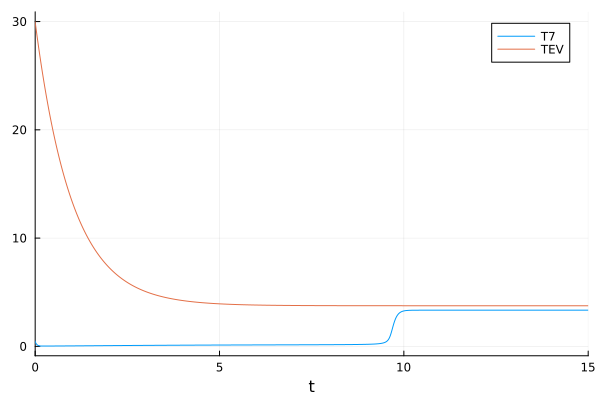

In [45]:
sol = solve(oprob, Tsit5(), saveat=0.01)
plt1 = plot(sol, idxs = [:T7, :TEV])

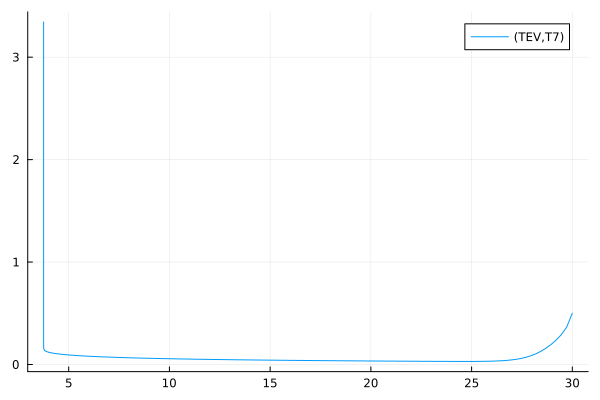

In [46]:
plt2 = plot(sol, idxs = (:TEV, :T7))